# SSICOV Canonical Example

Run this notebook from the `examples/` directory so `data/BridgeData.mat` is found.


In [8]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from scipy.signal import periodogram

from fast_ssi import SSICOV, cluster_data_by_frequency, plotStabDiag

DATA_DIR = Path("data").resolve()
mat = loadmat(DATA_DIR / "BridgeData.mat")
t, rz, wn = mat["t"], mat["rz"], mat["wn"]

## Load and prepare the dataset

The bridge data contains:
- `t`: time vector
- `rz`: displacement measurements from multiple sensors
- `wn`: natural frequencies (target values for validation)

The data is loaded from a MATLAB file and will be used to identify the modal parameters of the bridge structure using the canonical SSI-COV implementation.

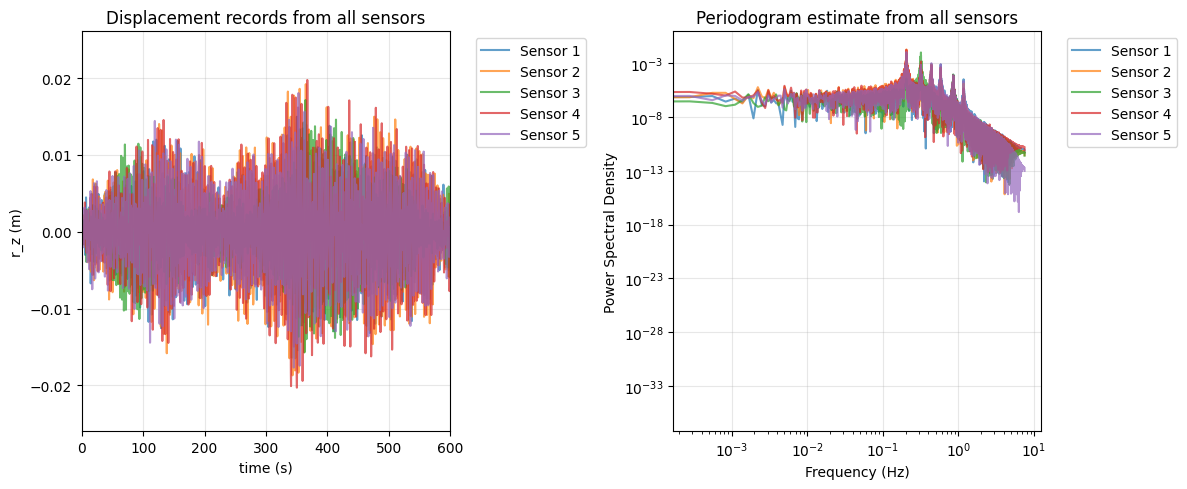

In [9]:
# Quick visualization of the loaded data
dt = np.median(np.diff(t))
fs = 1 / dt

plt.figure(figsize=(12, 5))

# Plot sensor data
plt.subplot(121)
for i in range(rz.shape[0]):
    plt.plot(t[0], rz[i, :], alpha=0.7, label=f"Sensor {i + 1}")
plt.xlim([0, 600])
plt.xlabel("time (s)")
plt.ylabel("r_z (m)")
plt.title("Displacement records from all sensors")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)

# Plot periodogram
plt.subplot(122)
for i in range(rz.shape[0]):
    f, Pxx = periodogram(rz[i, :], fs=fs)
    plt.plot(f, Pxx, alpha=0.7, label=f"Sensor {i + 1}")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.title("Periodogram estimate from all sensors")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.gcf().set_facecolor("w")
plt.show()

In [10]:
def plot_data(t, rz, wn):
    _fn_target = wn / (2 * np.pi)
    dt = np.median(np.diff(t))
    fs = 1 / dt

    plt.figure(figsize=(12, 5))

    # Subplot 1: Sensor data
    plt.subplot(121)
    for i in range(rz.shape[0]):
        plt.plot(t[0], rz[i, :], alpha=0.7, label=f"Sensor {i + 1}")
    plt.xlim([0, 600])
    plt.xlabel("time (s)")
    plt.ylabel("r_z (m)")
    plt.title("Displacement records from all sensors")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True, alpha=0.3)

    # Subplot 2: Periodogram
    plt.subplot(122)
    for i in range(rz.shape[0]):
        f, Pxx = periodogram(rz[i, :], fs=fs)
        plt.plot(f, Pxx, alpha=0.7, label=f"Sensor {i + 1}")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Spectral Density")
    plt.title("Periodogram estimate from all sensors")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.gcf().set_facecolor("w")
    plt.show()

## Run SSI-COV and visualize results

Here we:
1. Set the SSI parameters:
   - `fs = 15`: Sampling frequency (Hz)
   - `Ts = 10`: Time lag parameter
   - `Nmin = 7, Nmax = 50`: Range of model orders to test
   - `Nc`: Number of channels (sensors)

2. Initialize and run the canonical SSICOV algorithm

3. Cluster the identified poles by frequency to group similar modes

4. Plot the stabilization diagram showing stable poles across model orders

5. Display the input data and PSD estimates for validation

## Visualization function

The `plot_data` function creates a 2x2 subplot showing:
- Time-domain displacement records from sensors 2 and 5
- Power Spectral Density (PSD) estimates to identify dominant frequencies

This helps visualize the input data quality and frequency content before running the SSI algorithm.

NexT, elapsed time: 0.033545 seconds
 Elapse time 0.02118706703186035s
blockToeplitz, elapsed time: 0.022971 seconds
modalID, elapsed time: 0.003128 seconds
modalID, elapsed time: 0.002908 seconds
stabilityCheck, elapsed time: 0.002165 seconds
modalID, elapsed time: 0.002751 seconds
stabilityCheck, elapsed time: 0.002083 seconds
modalID, elapsed time: 0.002644 seconds
stabilityCheck, elapsed time: 0.001848 seconds
modalID, elapsed time: 0.002455 seconds
stabilityCheck, elapsed time: 0.001719 seconds
modalID, elapsed time: 0.002411 seconds
stabilityCheck, elapsed time: 0.001813 seconds
modalID, elapsed time: 0.002238 seconds
stabilityCheck, elapsed time: 0.001911 seconds
modalID, elapsed time: 0.002140 seconds
stabilityCheck, elapsed time: 0.001724 seconds
modalID, elapsed time: 0.002006 seconds
stabilityCheck, elapsed time: 0.001630 seconds
modalID, elapsed time: 0.001970 seconds
stabilityCheck, elapsed time: 0.001573 seconds
modalID, elapsed time: 0.001883 seconds
stabilityCheck, elap

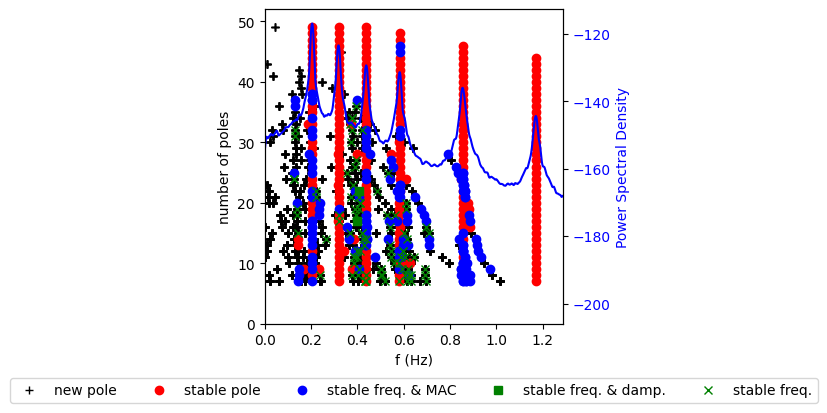

In [11]:
fs = 15
acc = rz.T
Nmin = 7
Nmax = 50
Nc = acc.shape[1]
Ts = 10

ssi = SSICOV(acc, fs, Ts, Nc, Nmax, Nmin)
fnS, zetaS, phiS, MACS, stability_status, fn2 = ssi.run()

num_clusters = 6
cluster_data_by_frequency(fnS, zetaS, phiS, num_clusters)
plotStabDiag(fn2, acc, fs, stability_status, Nmin, Nmax, acc.shape[1], 0, 7.5)